# Health Insurance Lead Prediction

### Data Dictionary:
- **ID** : Unique Identifier for a row
- **City_Code**: Code for the City of the customers
- **Region_Code** : Code for the Region of the customers
- **Accomodation_Type** : Customer Owns or Rents the house
- **Reco_Insurance_Type** : Joint or Individual type for the recommended insurance  
- **Upper_Age** : Maximum age of the customer 
- **Lower_Age** : Minimum age of the customer
- **Is_Spouse** : If the customers are married to each other (in case of joint insurance) 
- **Health_Indicator** : Encoded values for health of the customer
- **Holding_Policy_Duration** : Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
- **Holding_Policy_Type** : Type of holding policy
- **Reco_Policy_Cat** : Encoded value for recommended health insurance
- **Reco_Policy_Premium** : Annual Premium (INR) for the recommended health insurance
- **Response (Target)** : **0** = Customer did not show interest in the recommended policy, **1** = Customer showed interest in the recommended policy

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname, abspath
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the train file
root_dir = abspath('.')
root_dir

'C:\\Users\\EMKAY\\Desktop\\Greyatom\\AnalyticsVidhya\\JOB-A-THON'

In [3]:
train_data = os.path.join(root_dir, 'train_Df64byy.csv')
test_data = os.path.join(root_dir, 'test_YCcRUnU.csv')

In [4]:
train = pd.read_csv(train_data)
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


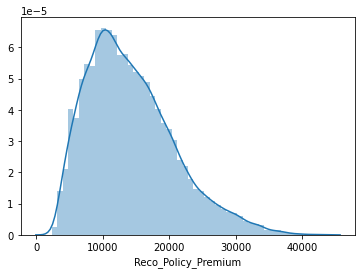

In [5]:
sns.distplot(train['Reco_Policy_Premium']);

In [6]:
train.describe(include = np.object)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [7]:
train['Accomodation_Type'].replace({'Owned':1, 'Rented':0}, inplace = True)

In [8]:
train['Reco_Insurance_Type'].replace({'Individual':1, 'Joint':0}, inplace = True)

In [9]:
train['Is_Spouse'].replace({'Yes':1, 'No':0}, inplace = True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null int64
Reco_Insurance_Type        50882 non-null int64
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null int64
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 5.4+ MB


In [11]:
train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

##### It is an imbalanced dataset

In [12]:
#Categorical features
train.describe(include = np.object)

,City_Code,Health Indicator,Holding_Policy_Duration
count,50882,39191,30631
unique,36,9,15
top,C1,X1,1.0
freq,8973,13010,4499


In [13]:
train.Region_Code.nunique()

5316

In [14]:
train.City_Code.nunique()

36

In [15]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"
# Removes Duplicates from train data
remove_duplicate(train)

'Checked Duplicates'

In [16]:
train.shape

(50882, 14)

* No duplicates

In [17]:
#Drop the ID column
train.drop('ID', axis = 1, inplace = True)

# DATA CLEANING

- Holding_Policy_Duration and Holding_Policy_Type seem to have blank values for the same rows - They could be customers filling the form and enquiring for the first time - which would make us replace the empty values with 0.

In [18]:
train.Holding_Policy_Type.nunique()

4

In [19]:
#There are only 4 categories(+ null values) of Holding POlicy Type
#First filling the null values with 0

train.Holding_Policy_Type.fillna(0, inplace = True)
train.Holding_Policy_Type.unique()

array([3., 0., 1., 4., 2.])

In [20]:
#Converting the numerical values into 5 categorical values
train['Holding_Policy_Type'] = train.Holding_Policy_Type.astype(str)

In [21]:
#Categorical Unique Values of the Holding Type

train.Holding_Policy_Type.dtype

dtype('O')

#### Holding_type_duration

In [22]:
#The duration is categorical because of the value 14+
#Replacing 14+ with 15 as it is the next higher number
train.Holding_Policy_Duration.replace(to_replace='14+', value='15', inplace = True)

#Fill the null values with 0
train.Holding_Policy_Duration.fillna(0, inplace = True)

#Duration should be numerical
train['Holding_Policy_Duration'] = train.Holding_Policy_Duration.astype(float)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null int64
Reco_Insurance_Type        50882 non-null int64
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null int64
Health Indicator           39191 non-null object
Holding_Policy_Duration    50882 non-null float64
Holding_Policy_Type        50882 non-null object
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 5.4+ MB


#### Health indicator

In [24]:
#null values
train['Health Indicator'].isnull().sum()

11691

In [25]:
#We can replace the null values with a made up health indicator X0 which means that the customer does not fall in any of the categories
train['Health Indicator'].fillna('X0', inplace = True)

### ENCODING THE CATEGORICAL COLUMNS

#### Holding_Policy_Type

In [26]:
#encoding Holding_Policy_Type

hold_dummies = pd.get_dummies(train.Holding_Policy_Type)
#merging the dummies with the dataframe
train = pd.concat([train,hold_dummies], axis = 'columns')
#dropping Holding_Policy_Type column and a dummy variable to avoid the dummy variable trap
train.drop(['Holding_Policy_Type','0.0'], axis = 'columns', inplace = True)
train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,1.0,2.0,3.0,4.0
0,C3,3213,0,1,36,36,0,X1,15.0,22,11628.0,0,0,0,1,0
1,C5,1117,1,0,75,22,0,X2,0.0,22,30510.0,0,0,0,0,0
2,C5,3732,1,1,32,32,0,X0,1.0,19,7450.0,1,1,0,0,0
3,C24,4378,1,0,52,48,0,X1,15.0,19,17780.0,0,0,0,1,0
4,C8,2190,0,1,44,44,0,X2,3.0,16,10404.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,0,1,22,22,0,X3,0.0,18,7704.0,0,0,0,0,0
50878,C5,4188,0,1,27,27,0,X3,7.0,4,5408.0,0,0,0,1,0
50879,C1,442,0,1,63,63,0,X2,15.0,12,11374.0,0,1,0,0,0
50880,C1,4,1,0,71,49,0,X2,2.0,16,28179.2,1,0,1,0,0


#### Health Indicator

In [27]:
#encoding Health Indicator

health_dummies = pd.get_dummies(train['Health Indicator'])
#merging the dummies with the dataframe
train = pd.concat([train,health_dummies], axis = 'columns')
#dropping Health Indicator column and a dummy variable to avoid the dummy variable trap
train.drop(['Health Indicator','X0'], axis = 'columns', inplace = True)
train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,...,4.0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,C3,3213,0,1,36,36,0,15.0,22,11628.0,...,0,1,0,0,0,0,0,0,0,0
1,C5,1117,1,0,75,22,0,0.0,22,30510.0,...,0,0,1,0,0,0,0,0,0,0
2,C5,3732,1,1,32,32,0,1.0,19,7450.0,...,0,0,0,0,0,0,0,0,0,0
3,C24,4378,1,0,52,48,0,15.0,19,17780.0,...,0,1,0,0,0,0,0,0,0,0
4,C8,2190,0,1,44,44,0,3.0,16,10404.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,0,1,22,22,0,0.0,18,7704.0,...,0,0,0,1,0,0,0,0,0,0
50878,C5,4188,0,1,27,27,0,7.0,4,5408.0,...,0,0,0,1,0,0,0,0,0,0
50879,C1,442,0,1,63,63,0,15.0,12,11374.0,...,0,0,1,0,0,0,0,0,0,0
50880,C1,4,1,0,71,49,0,2.0,16,28179.2,...,0,0,1,0,0,0,0,0,0,0


#### City_Code

In [28]:
#encoding City_Code

city_dummies = pd.get_dummies(train['City_Code'])
#merging the dummies with the dataframe
train = pd.concat([train,city_dummies], axis = 'columns')
#dropping City_Code column and a dummy variable to avoid the dummy variable trap
train.drop(['City_Code','C31'], axis = 'columns', inplace = True)
train

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
0,3213,0,1,36,36,0,15.0,22,11628.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1117,1,0,75,22,0,0.0,22,30510.0,0,...,0,0,0,0,0,1,0,0,0,0
2,3732,1,1,32,32,0,1.0,19,7450.0,1,...,0,0,0,0,0,1,0,0,0,0
3,4378,1,0,52,48,0,15.0,19,17780.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2190,0,1,44,44,0,3.0,16,10404.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,845,0,1,22,22,0,0.0,18,7704.0,0,...,0,0,0,0,1,0,0,0,0,0
50878,4188,0,1,27,27,0,7.0,4,5408.0,0,...,0,0,0,0,0,1,0,0,0,0
50879,442,0,1,63,63,0,15.0,12,11374.0,0,...,0,0,0,0,0,0,0,0,0,0
50880,4,1,0,71,49,0,2.0,16,28179.2,1,...,0,0,0,0,0,0,0,0,0,0


### StandardScaler

In [29]:
train.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,...,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,0.549330,0.796667,44.856275,42.738866,0.165520,3.706379,15.115188,14183.950069,0.239947,...,0.005621,0.002555,0.001101,0.000708,0.072147,0.026807,0.038324,0.037538,0.035494,0.042942
std,1424.081652,0.497566,0.402482,17.310271,17.319375,0.371653,4.766053,6.340663,6590.074873,0.427055,...,0.074762,0.050482,0.033157,0.026590,0.258734,0.161521,0.191979,0.190077,0.185026,0.202729
min,1.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,1.000000,2280.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523.000000,0.000000,1.000000,28.000000,27.000000,0.000000,0.000000,12.000000,9248.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1391.000000,1.000000,1.000000,44.000000,40.000000,0.000000,2.000000,17.000000,13178.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2667.000000,1.000000,1.000000,59.000000,57.000000,0.000000,6.000000,20.000000,18096.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6194.000000,1.000000,1.000000,75.000000,75.000000,1.000000,15.000000,22.000000,43350.400000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
train['Reco_Policy_Premium']= ss.fit_transform(train[['Reco_Policy_Premium']])

In [31]:
train.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
0,3213,0,1,36,36,0,15.0,22,-0.387852,0,...,0,0,0,0,0,0,0,0,0,0
1,1117,1,0,75,22,0,0.0,22,2.477394,0,...,0,0,0,0,0,1,0,0,0,0
2,3732,1,1,32,32,0,1.0,19,-1.021842,1,...,0,0,0,0,0,1,0,0,0,0
3,4378,1,0,52,48,0,15.0,19,0.545682,0,...,0,0,0,0,0,0,0,0,0,0
4,2190,0,1,44,44,0,3.0,16,-0.573588,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
train['Region_Code']= ss.fit_transform(train[['Region_Code']])

In [33]:
train.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
0,1.039425,0,1,36,36,0,15.0,22,-0.387852,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.432415,1,0,75,22,0,0.0,22,2.477394,0,...,0,0,0,0,0,1,0,0,0,0
2,1.403874,1,1,32,32,0,1.0,19,-1.021842,1,...,0,0,0,0,0,1,0,0,0,0
3,1.857504,1,0,52,48,0,15.0,19,0.545682,0,...,0,0,0,0,0,0,0,0,0,0
4,0.321060,0,1,44,44,0,3.0,16,-0.573588,0,...,0,0,0,0,0,0,0,0,1,0


### MODEL BUILDING

In [35]:
from collections import Counter
x = train.drop('Response', axis = 1)
y = train.Response
print(Counter(y))

Counter({0: 38673, 1: 12209})


### Handling imbalanced data using RandomOverSampler() method of imblearn

In [36]:
from imblearn.over_sampling import RandomOverSampler
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x, y = ros.fit_resample(x, y)
# new class distribution 
from collections import Counter
print(Counter(y))

Using TensorFlow backend.


Counter({0: 38673, 1: 38673})


In [37]:
#Hold-out method
#Splitting the dataset into train data and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
print(X_train.shape, X_test.shape)

(61876, 57) (15470, 57)


In [41]:
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
prediction = model.predict(X_test)

# Random Forest Classifier

In [43]:
    from sklearn.ensemble.forest import RandomForestClassifier
    rf_model =RandomForestClassifier(n_estimators =150)
    rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
random = rf_model.predict(X_test)

# XGBoost

In [45]:
clf_xgb=XGBClassifier()
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
ypred_xgb = clf_xgb.predict(X_test)

# Logistic Regression

In [47]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)

# Adaboost

In [48]:
clf_ada = AdaBoostClassifier(n_estimators=100,learning_rate=0.9, random_state=77, )
clf_ada.fit(X_train, y_train)
ypred_ada = clf_ada.predict(X_test)

### The evaluation metric is roc_auc_score

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
#DecisionTree Classifier
roc_auc_score(y_test,prediction)

0.8549195731702212

In [51]:
#RandomForest classifier
roc_auc_score(y_test,random)

0.9271476617143033

In [52]:
#XGBoost
roc_auc_score(y_test, ypred_xgb)

0.5982877783453282

In [53]:
#Logistic Regression
roc_auc_score(y_test, y_pred_log)

0.5449016977557211

In [54]:
#### adaboost
roc_auc_score(y_test, ypred_ada)

0.5876386032403257

In [55]:
train.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
0,1.039425,0,1,36,36,0,15.0,22,-0.387852,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.432415,1,0,75,22,0,0.0,22,2.477394,0,...,0,0,0,0,0,1,0,0,0,0
2,1.403874,1,1,32,32,0,1.0,19,-1.021842,1,...,0,0,0,0,0,1,0,0,0,0
3,1.857504,1,0,52,48,0,15.0,19,0.545682,0,...,0,0,0,0,0,0,0,0,0,0
4,0.321060,0,1,44,44,0,3.0,16,-0.573588,0,...,0,0,0,0,0,0,0,0,1,0


## LightGBM

In [56]:
import lightgbm as lgb

In [57]:
params = {}
params['learning_rate'] = 0.045
params['max_depth'] = 18
params['num_leaves'] = 40
params['n_estimators'] = 3000
params['objective'] = 'binary'
params['boosting_type'] = 'goss'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.5, 1: 0.5}



clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)

y_pred_lgb = clf.predict(X_test)

eval_score = roc_auc_score(y_test, y_pred_lgb)

print('Eval ACC: {}'.format(eval_score))


[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
Eval ACC: 0.7705751663528035


# Support Vector Machine

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = SVR()
rnd_search_cv.fit(X_train, y_train)

y_pred_rnd = rnd_search_cv.predict(X_test)
score = roc_auc_score(y_test, y_pred_rnd)
score

## TEST DATA EVALUATION

### PREPARING THE TEST DATASET

In [61]:
test = pd.read_csv(test_data)
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [63]:
dt_ID = test['ID']

In [64]:
#Dropping the ID column
test.drop('ID', axis = 1, inplace = True)

In [65]:
#Accomodation_Type
test['Accomodation_Type'].replace({'Owned':1, 'Rented':0}, inplace = True)

#Reco_Insurance_Type
test['Reco_Insurance_Type'].replace({'Individual':1, 'Joint':0}, inplace = True)

#Is_Spouse
test['Is_Spouse'].replace({'Yes':1, 'No':0}, inplace = True)

#### Holding_Policy_Type

In [66]:
#Holding_Policy_type
test.Holding_Policy_Type.fillna(0, inplace = True)
test.Holding_Policy_Type.unique()

array([3., 4., 0., 1., 2.])

In [67]:
#Converting the numerical values into 5 categorical values
test['Holding_Policy_Type'] = test.Holding_Policy_Type.astype(str)

In [68]:
#encoding Holding_Policy_Type

hold_test_dummies = pd.get_dummies(test.Holding_Policy_Type)
#merging the dummies with the dataframe
test = pd.concat([test,hold_test_dummies], axis = 'columns')
#dropping Holding_Policy_Type column and a dummy variable to avoid the dummy variable trap
test.drop(['Holding_Policy_Type','0.0'], axis = 'columns', inplace = True)

#### Holding_Type_Duration

In [69]:
#The duration is categorical because of the value 14+
#Replacing 14+ with 15 as it is the next higher number
test.Holding_Policy_Duration.replace(to_replace='14+', value='15', inplace = True)

#Fill the null values with 0
test.Holding_Policy_Duration.fillna(0, inplace = True)

#Duration should be numerical
test['Holding_Policy_Duration'] = test.Holding_Policy_Duration.astype(float)

#### Health_Indicator

In [70]:
#null values
test['Health Indicator'].isnull().sum()

#We can replace the null values with a made up health indicator X0 which means that the customer does not fall in any of the categories
test['Health Indicator'].fillna('X0', inplace = True)

In [71]:
#encoding Health Indicator

health_test_dummies = pd.get_dummies(test['Health Indicator'])
#merging the dummies with the dataframe
test = pd.concat([test,health_test_dummies], axis = 'columns')
#dropping Health Indicator column and a dummy variable to avoid the dummy variable trap
test.drop(['Health Indicator','X0'], axis = 'columns', inplace = True)

#### City_Code

In [72]:
#encoding City_Code

city_test_dummies = pd.get_dummies(test['City_Code'])
#merging the dummies with the dataframe
test = pd.concat([test,city_test_dummies], axis = 'columns')
#dropping City_Code column and a dummy variable to avoid the dummy variable trap
test.drop(['City_Code','C31'], axis = 'columns', inplace = True)

In [73]:
test.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,1.0,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
count,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,...,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000
mean,1748.737491,0.554460,0.795276,44.877734,42.748085,0.164091,3.750103,15.138363,14220.306581,0.163907,...,0.004861,0.002706,0.001513,0.000825,0.071497,0.027471,0.037560,0.036139,0.035451,0.041458
std,1438.358949,0.497037,0.403509,17.254898,17.269112,0.370366,4.783514,6.302805,6497.996164,0.370200,...,0.069555,0.051948,0.038874,0.028720,0.257660,0.163454,0.190134,0.186639,0.184920,0.199352
min,1.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,1.000000,2152.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,535.000000,0.000000,1.000000,28.000000,27.000000,0.000000,0.000000,12.000000,9285.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1392.000000,1.000000,1.000000,44.000000,41.000000,0.000000,2.000000,17.000000,13244.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2712.000000,1.000000,1.000000,59.000000,57.000000,0.000000,6.000000,20.000000,18201.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6185.000000,1.000000,1.000000,75.000000,75.000000,1.000000,15.000000,22.000000,43776.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
test['Reco_Policy_Premium']= ss.fit_transform(test[['Reco_Policy_Premium']])

In [75]:
#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
test['Region_Code']= ss.fit_transform(test[['Region_Code']])

### PREDICTING VALUES FOR THE TEST DATASET
- Finally the LightGBM classifier with the perfect parameters is the one which gives the best ROC-AUC score and hence can be used to predict on the test dataset given.

In [76]:
test_y_pred = clf.predict(test)

In [77]:
submission_file = pd.DataFrame(test_y_pred,index = dt_ID,columns = ['Response'])

In [78]:
submission_file.head()

,Response
ID,
50883,1
50884,0
50885,0
50886,0
50887,0


In [79]:
submission_file.to_csv('submission_file_12.csv', index = True)